In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import silhouette_score


Read the Data. 

Delimiter=',': This parameter indicates the delimiter used in the CSV file to separate the values. In this case, it is set to a comma (',').

In [2]:
df = pd.read_csv('artificial_data.txt', names=['x', 'y', 'class'], delimiter=',')

In [3]:
df

,x,y,class
0,0.28283,0.88552,1
1,0.27609,0.86195,1
2,0.27273,0.84512,1
3,0.27273,0.82492,1
4,0.27273,0.78451,1
...,...,...,...
480,0.41414,0.52525,8
481,0.41414,0.50505,8
482,0.40404,0.49495,8
483,0.44108,0.51515,8


This part of the code involves plotting the data points from the DataFrame df with different colors based on their class




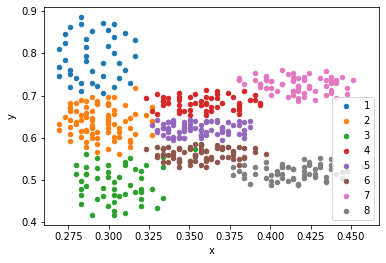

In [4]:
# Get the list of unique classes in the DataFrame
classes = df['class'].unique()

# Define colors for each class
colors = {c: plt.cm.tab10(i) for i, c in enumerate(classes)}

# Plot the points with different colors based on their class
fig, ax = plt.subplots()
for key, group in df.groupby('class'):
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

centroids[0] = data[np.random.choice(data.shape[0])] - This line randomly selects one data point from the data array and assigns it as the first centroid.

distances = np.sqrt(((data - centroids[:i, np.newaxis])**2).sum(axis=2)) - This line calculates the Euclidean distances between each data point and the previously selected centroids.



In [5]:
def k_means(data, k, num_iterations=100):
    # Initialize centroids using k-means++ initialization
    centroids = np.zeros((k, data.shape[1]))
    centroids[0] = data[np.random.choice(data.shape[0])]
    for i in range(1, k):
        distances = np.sqrt(((data - centroids[:i, np.newaxis])**2).sum(axis=2))
        min_distances = distances.min(axis=0)
        probs = min_distances / min_distances.sum()
        centroids[i] = data[np.random.choice(data.shape[0], p=probs)]
    
    for _ in range(num_iterations):
        # Assign each data point to the closest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids to be the mean of the assigned points
        for i in range(k):
            centroids[i] = data[labels == i].mean(axis=0)
    
    return labels, centroids

This part of the code performs k-means clustering on the 'x' and 'y' columns of the DataFrame df and visualizes the results for different values of k. The black dots are the center of the clusters. 

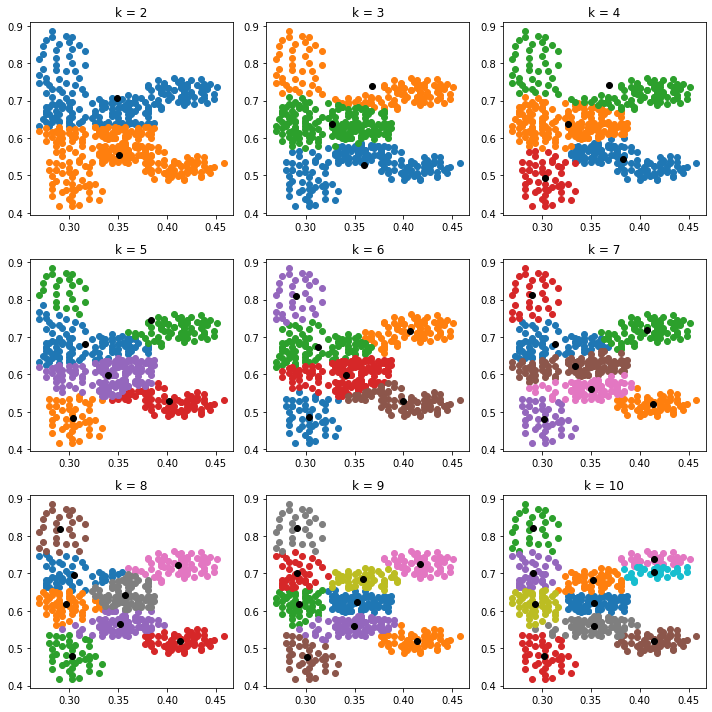

In [6]:
X = df[['x', 'y']].values

# Define the range of k values to try
k_values = range(2, 11)

# Cluster the data for each value of k and plot the results
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.ravel()
for i, k in enumerate(k_values):
    # Cluster the data using k-means
    labels, centroids = k_means(X, k)
    
    # Plot the data points with different colors for each cluster
    for j in range(k):
        axs[i].scatter(X[labels == j, 0], X[labels == j, 1], label=f'Cluster {j+1}')
        
    # Plot the centroids as black circles
    axs[i].scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black')
    
    axs[i].set_title(f'k = {k}')
    # axs[i].legend()

plt.tight_layout()
plt.show()

What is the best k? Explain

For finding the best K, we use the elbow method.

The elbow method is a heuristic approach used to determine an optimal number of clusters (k) in the k-means clustering algorithm. It helps to identify the point of diminishing returns when increasing the number of clusters, also known as the "elbow" point.

Here's how the elbow method works:

    1-Perform k-means clustering with different values of k on your dataset.
    2-For each value of k, calculate the sum of squared distances between each point and its assigned centroid (also known as the inertia or within-cluster sum of squares).
    3-Plot the values of k against the corresponding inertia values.
    4-Examine the resulting plot, looking for the "elbow" or bend in the curve.
    5-The "elbow" point represents a good trade-off between minimizing the inertia (making each cluster more compact) and avoiding overfitting (having too many clusters that might not provide significantly better results).
    6-Choose the value of k at the "elbow" point as the optimal number of clusters for your data.

    Now, based on the figure, we can see that K=5 is the best k for this problem.


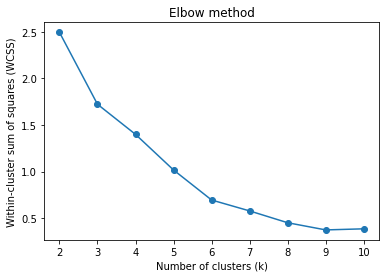

In [19]:

# Compute the within-cluster sum of squares for each value of k
wcss_values = []
for k in k_values:
    labels, centroids = k_means(X, k)
    wcss = ((X - centroids[labels])**2).sum()
    wcss_values.append(wcss)

# Plot the WCSS as a function of k
plt.plot(k_values, wcss_values, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method')
plt.show()

Here we define several distance measures and a function that returns the appropriate distance measure based on the input parameter M. Here's an explanation of each function: 

In [8]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link



    The AgglomerativeHierarchicalClustering function takes three parameters: data (the dataset to be clustered), K (the desired number of clusters), and M (the distance measure).

    The function first initializes each data point as a separate cluster using the init_clusters function.

    The find_closest_clusters function iterates over the clusters and finds the pair that has the minimum distance according to the selected distance measure. It returns the IDs of the closest clusters.

    The merge_and_form_new_clusters function merges the two closest clusters into a new cluster while maintaining the other clusters unchanged. It returns the updated cluster dictionary.

    The main loop of the clustering algorithm continues until the number of clusters reaches the desired K value. In each iteration, it finds the closest clusters, merges them, and updates the cluster dictionary.

    Finally, the function returns the items of the resulting cluster dictionary, where each item represents a cluster ID and its corresponding data points.


In [9]:
import math

def AgglomerativeHierarchicalClustering(data, K, M):

    N = len(data)
    measure = get_distance_measure(M)

    def init_clusters():
        return {data_id: [data_point] for data_id, data_point in enumerate(data)}

    def find_closest_clusters(clusters):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = measure(clusters[cluster_i], clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(clusters, ci_id, cj_id):
        new_clusters = {0: clusters[ci_id] + clusters[cj_id]}

        for cluster_id in clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = clusters[cluster_id]
        return new_clusters

    clusters = init_clusters()

    while len(clusters.keys()) > K:
        closest_clusters = find_closest_clusters(clusters)
        clusters = merge_and_form_new_clusters(clusters, *closest_clusters)
    return(clusters.items())

 

In [10]:
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(X, 5, "single_link")

Here we plot the results of the hierarchical clustering. This is not for optimal! 

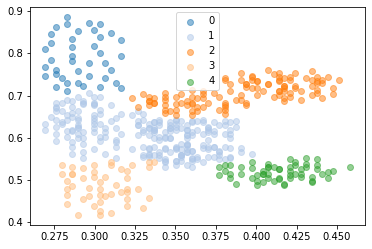

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data dictionary


# Unpack the data dictionary into x and y values and their corresponding class labels
x_values = []
y_values = []
class_labels = []

for key, value in agg_hierarchical_clustering:
    for point in value:
        x_values.append(point[0])
        y_values.append(point[1])
        class_labels.append(key)

# Generate a list of unique class labels and corresponding colors
unique_labels = set(class_labels)
num_labels = len(unique_labels)
cmap = plt.get_cmap('tab20')
colors = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}

# Create a scatter plot with different colors for each cluster
for i, label in enumerate(unique_labels):
    x = [x_values[j] for j in range(len(x_values)) if class_labels[j] == label]
    y = [y_values[j] for j in range(len(y_values)) if class_labels[j] == label]
    plt.scatter(x, y, c=[colors[i]], label=label, alpha=0.5)

# Add a legend and show the plot
plt.legend()
plt.show()

We can find the best K with the elbow method. We can see that the best K is 6

K is 2 and within cluster variance is 0.005710035500925606
K is 3 and within cluster variance is 0.004173636971024957
K is 4 and within cluster variance is 0.002950174726464149
K is 5 and within cluster variance is 0.001963662703045473
K is 6 and within cluster variance is 0.001418939345782975
K is 7 and within cluster variance is 0.0012530061483932082
K is 8 and within cluster variance is 0.0010169117925192483
K is 9 and within cluster variance is 0.0008521517486648609


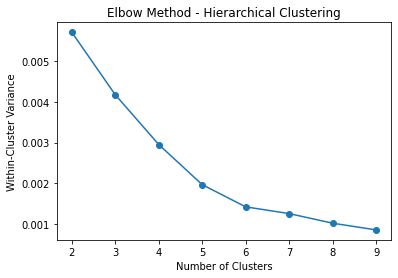

In [12]:
import numpy as np

# Perform agglomerative hierarchical clustering with different numbers of clusters
cluster_range = range(2, 10)
variance_values = []

for k in cluster_range:
    agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(X, k, "single_link")
    clusters = dict(agg_hierarchical_clustering)  # Convert dict_items to a dictionary
    variances = []
    
    for cluster_id, cluster_points in clusters.items():
        # Extract the data points from each cluster
        data_points = np.array(cluster_points)
        
        # Calculate within-cluster variance
        centroid = np.mean(data_points, axis=0)
        variance = np.mean(np.sum((data_points - centroid)**2, axis=1))
        variances.append(variance)
    
    within_cluster_variance = np.mean(variances)
    print("K is {} and within cluster variance is {}".format(k,within_cluster_variance))
    variance_values.append(within_cluster_variance)

# Plot the number of clusters vs. within-cluster variance
plt.plot(cluster_range, variance_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Variance')
plt.title('Elbow Method - Hierarchical Clustering')
plt.show()

Calculating for the best K which is 6

In [20]:
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(X, 6, "single_link")

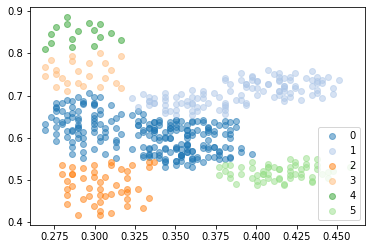

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data dictionary


# Unpack the data dictionary into x and y values and their corresponding class labels
x_values = []
y_values = []
class_labels = []

for key, value in agg_hierarchical_clustering:
    for point in value:
        x_values.append(point[0])
        y_values.append(point[1])
        class_labels.append(key)

# Generate a list of unique class labels and corresponding colors
unique_labels = set(class_labels)
num_labels = len(unique_labels)
cmap = plt.get_cmap('tab20')
colors = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}

# Create a scatter plot with different colors for each cluster
for i, label in enumerate(unique_labels):
    x = [x_values[j] for j in range(len(x_values)) if class_labels[j] == label]
    y = [y_values[j] for j in range(len(y_values)) if class_labels[j] == label]
    plt.scatter(x, y, c=[colors[i]], label=label, alpha=0.5)

# Add a legend and show the plot
plt.legend()
plt.show()

According to the real classes, which clustering algorithm has performed better? Check and
explain your method

Now, Here we can use silhouette score to compare these two algorithms. 



Compute the silhouette score for each algorithm:

    For K-means clustering, calculate the average silhouette score over all samples.
    For hierarchical agglomerative clustering, calculate the silhouette score for each sample and then take the average.

Compare the silhouette scores:

    If one algorithm has a higher average silhouette score than the other, it indicates that its clusters are better separated and more distinct.


In [33]:
k_means_sil=[]
for i, k in enumerate(k_values):
    # Cluster the data using k-means
    labels, centroids = k_means(X, k)
    k_means_sil.append(silhouette_score(X, labels))



print("Average Silhouette Score for K means is :", sum(k_means_sil)/len(k_means_sil))
print("Average Silhouette Score for K agglomerative is :", sum(variance_values)/len(variance_values))

Average Silhouette Score for K means is : 0.43919494549568433
Average Silhouette Score for K agglomerative is : 0.0024173148671025597


We can see that k means has a higher Silhouette score. So it performed better.